In [ ]:
# from flask import Flask
# import ghhops_server as hs
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import all_graphs
from utils import *

In [ ]:
df = pd.read_csv('../GH_example/test.csv', lineterminator='@')
df

: 

In [18]:
def empty2none(args):
    for k, v in args.items():
        if type(v) == str:
            args[k] = None if v == '' else v
    return args

def clean_args(args):  
    # remove optional args
    args.pop('add_args')
    args.pop('axis_args')
    args.pop('despine')
    
    args = empty2none(args)
    
    return args
    

def box(data, x, y, hue, palette, despine={}, add_args={}, axis_args={}):
    # https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
    
    args = clean_args(locals())

    g = sns.boxplot(**args, **add_args)
    g.set(**axis_args)
        
    if despine:
        sns.despine(**despine)
    
    # tight layout
    plt.tight_layout()
    
    return g
    
    # return base64img()

In [19]:
import json

data = '{}'
ax_args = json.loads(data)
ax_args


{}

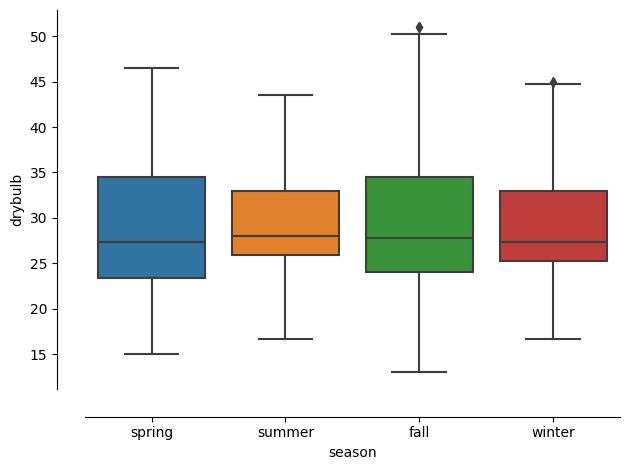

In [20]:

# plot
g = box(data = df, x= 'season', y= 'drybulb', hue= '', palette= '', axis_args=ax_args, despine={'offset': 20})

plt.show()

In [21]:
def json_parser(*json_str):
    
    return [json.loads(f) for f in json_str]

In [22]:
g_despine = '{"offset": 20}'
g_add_args = '{"test": 10}'
g_ax_args = '{"third": 100}'

g_despine, g_add_args, g_ax_args = json_parser(g_despine, g_add_args, g_ax_args)

print(g_despine, g_add_args, g_ax_args)


{'offset': 20} {'test': 10} {'third': 100}
